# **Global Cyber Threats 2015-2024 data ETL**

## Objectives

- Fetch data from Kaggle and save as raw data
- Transform the data to a clean format
- Load the clean data for further analysis
- Visualize the data to understand trends and patterns

## Inputs

- Kaggle dataset: [Global Cyber Threats 2015-2024](https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024?resource=download)
- Python libraries: pandas, numpy, matplotlib, seaborn, plotly

In [17]:
import pandas as pd
import numpy as np

#raw data import and table sample

In [18]:
df = pd.read_csv(r"C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends\global_cybersecurity_threats_2015-2024.csv")
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [19]:
# check for missing values
missing_values = df.isnull().sum()

In [20]:
# check column data types
column_types = df.dtypes

In [21]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


#as no missing values or wrong data types are found, there is no need to replace, convert or drop functions

In [22]:
#check for duplicates
df.drop_duplicates(inplace=True)

#save clean data

In [ ]:
df.to_csv(r"C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv", index=False)

In [24]:
# preview saved data
cleaned_df = pd.read_csv("C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv")
cleaned_df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


#EDA

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [26]:
cleaned_df = pd.read_csv("C:/Users/lilia/Hackathon/Global-Cybersecurity-Threats-and-Trends/clean_global_cybersecurity_threats.csv")

C:\Users\lilia\AppData\Local\Temp\ipykernel_11908\1220823832.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_df, x='Year', palette='viridis')


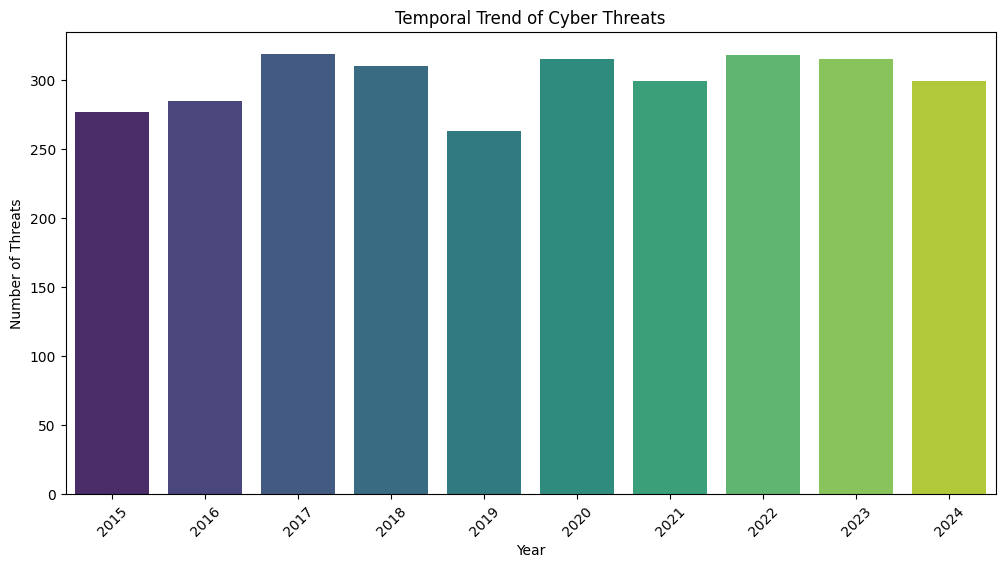

In [27]:
# temporal trend of cyber threats
plt.figure(figsize=(12, 6))
cleaned_df['Year'] = pd.to_datetime(cleaned_df['Year'], format='%Y')
cleaned_df['Year'] = cleaned_df['Year'].dt.year
sns.countplot(data=cleaned_df, x='Year', palette='viridis')
plt.title('Temporal Trend of Cyber Threats')
plt.xlabel('Year')
plt.ylabel('Number of Threats')
plt.xticks(rotation=45)
plt.show()


#attacks seem to be consistent throughout the 10 years period with slight drops in 2015, 2016 and 2019

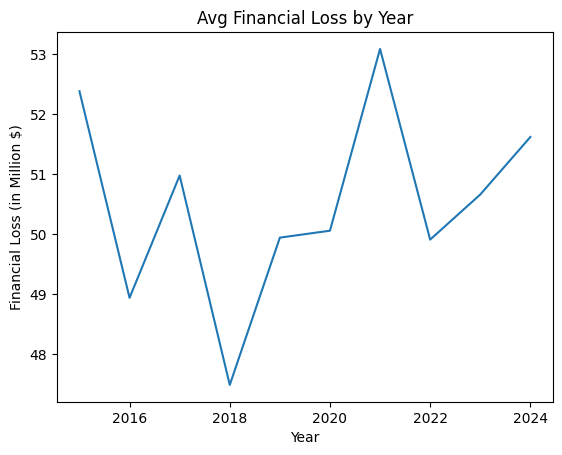

In [28]:
# financial loss over time
df['Financial Loss (in Million $)'] = pd.to_numeric(df['Financial Loss (in Million $)'], errors='coerce')
annual = df.groupby('Year')['Financial Loss (in Million $)'].mean().reset_index()
sns.lineplot(data=annual, x='Year', y='Financial Loss (in Million $)')
plt.title("Avg Financial Loss by Year")
plt.show()

#the financial loss average alternates almost every year from spikes to drops. We need further investigation to understand the causality of those results

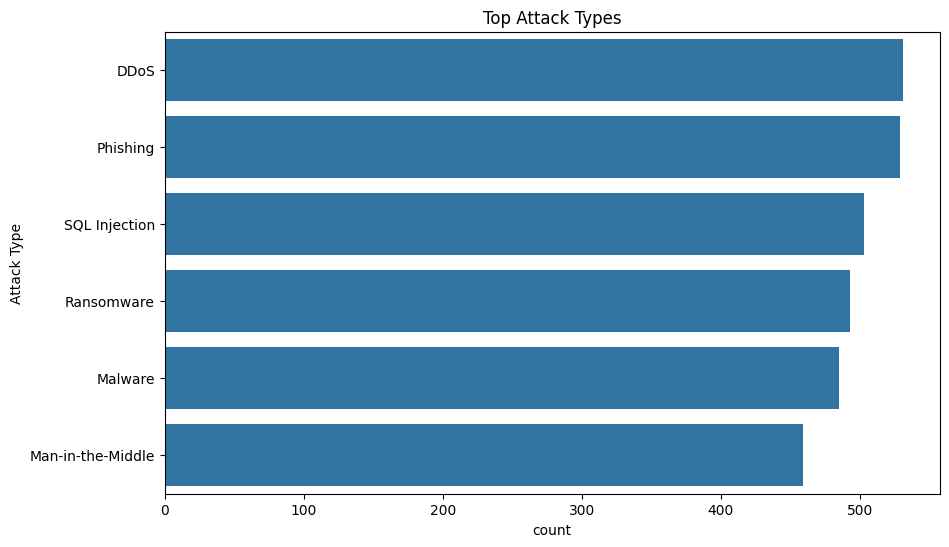

In [29]:
# attack types distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title("Top Attack Types")
plt.show()

#this sample data has quite an even spread of attack types

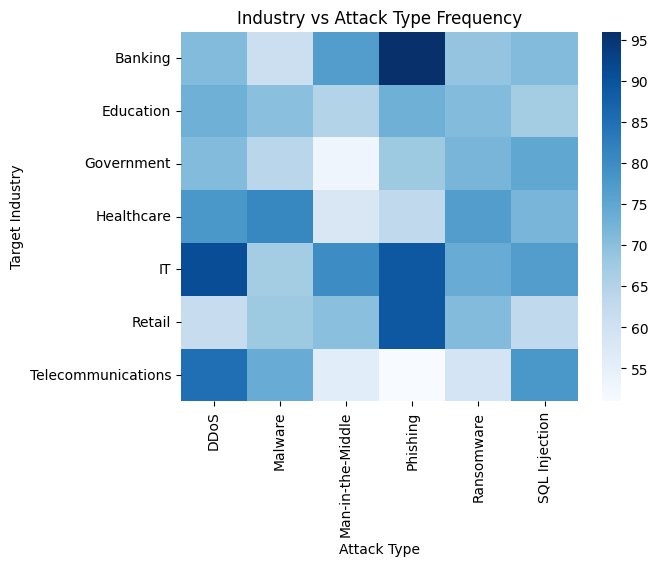

In [30]:
# heatmap of attack types by industry
ct = pd.crosstab(df['Target Industry'], df['Attack Type'])
sns.heatmap(ct, cmap="Blues")
plt.title("Industry vs Attack Type Frequency")
plt.show()

#it clearly show the correlation between DDOS and Phishing attacks prevalence on IT, Telecomm and Banking sectors respectively 

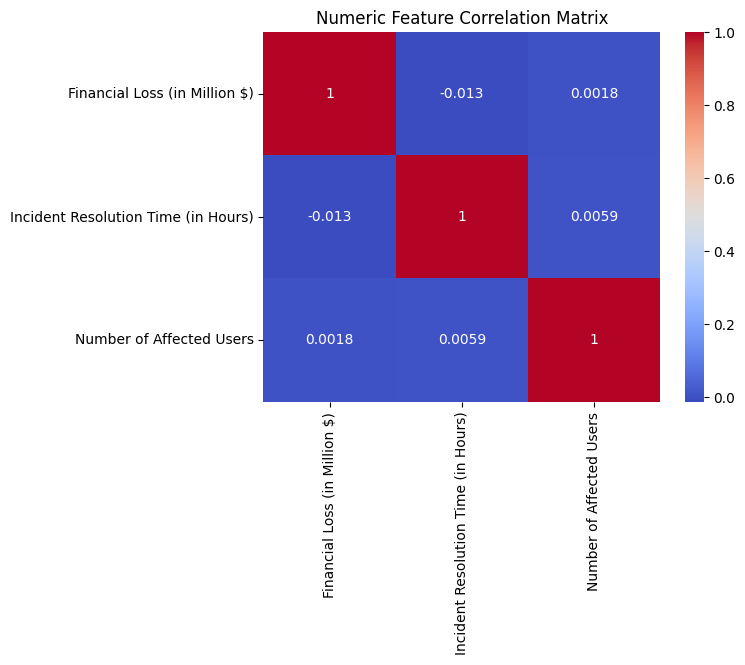

In [38]:
#correlation map
corr = df[['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)', 'Number of Affected Users']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation Matrix")
plt.show()

C:\Users\lilia\AppData\Local\Temp\ipykernel_11908\4100252006.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




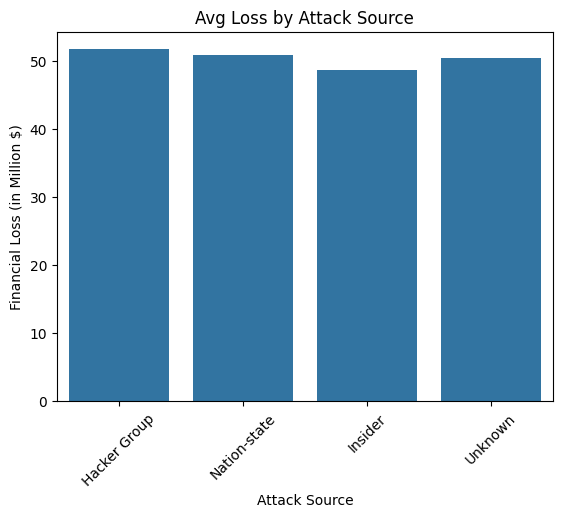

In [39]:
#attack source vs severity
sns.barplot(data=df, x='Attack Source', y='Financial Loss (in Million $)', ci=None)
plt.xticks(rotation=45)
plt.title("Avg Loss by Attack Source")
plt.show()

#we can see that hacker groups and nation-state attacks come first in terms of finnacial loss